In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# load data into a df

In [376]:
df_app = pd.read_csv('googleplaystore.csv')
df_app.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# find out no. of nulls per column

In [377]:
df_app.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Dropping nulls value

In [378]:

df_app.dropna(axis=0,inplace=True)
#reset index since we dropped rows.
df_app.reset_index(drop=True,inplace=True)
df_app.isnull().sum()



App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [379]:
df_app['Size'].tail(15)


9345                  8.0M
9346                  3.6M
9347                  8.6M
9348    Varies with device
9349                   13M
9350                   13M
9351                  7.4M
9352                  2.3M
9353                  582k
9354                  619k
9355                  2.6M
9356                   53M
9357                  3.6M
9358    Varies with device
9359                   19M
Name: Size, dtype: object

# fix Size column by converting MB into KB and extracting numerical value

In [380]:

m_index = df_app['Size'].loc[df_app['Size'].str.contains('M')].index.tolist()
converter = pd.DataFrame(df_app.loc[m_index,'Size'].apply(lambda x: x.strip('M')).astype(float).apply(lambda x : x * 1000)).astype(str)
df_app.loc[m_index,'Size'] = converter

In [381]:
df_app.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [382]:
df_app['Size'].tail(10)


9350               13000.0
9351                7400.0
9352                2300.0
9353                  582k
9354                  619k
9355                2600.0
9356               53000.0
9357                3600.0
9358    Varies with device
9359               19000.0
Name: Size, dtype: object

# Size cleaning

In [383]:

df_app['Size'] = df_app['Size'].apply(lambda x: x.strip('k'))
df_app[df_app['Size'] == 'Varies with device'] = 0
df_app['Size'] = df_app['Size'].astype(float)

In [384]:
df_app.dtypes


App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# change data type

In [385]:
df_app['Reviews'] = df_app['Reviews'].astype(int)


# Remove '+' and ',' from numerical value

In [386]:
df_app['Installs'] = df_app['Installs'].astype(str).apply(lambda x: x.strip('\+'))

In [387]:
df_app['Installs'] = [int(i.replace(',','')) for i in df_app['Installs']]


In [388]:
df_app['Installs'].tail(15)
df_app.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int32  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 914.2+ KB


# Remove $ sign, and convert to numeric

In [389]:
df_app['Price'] = df_app['Price'].astype(str).apply(lambda x: x.strip('\$'))
df_app['Price'] = df_app['Price'].astype(float)




# Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [390]:
df_app.drop(df_app[df_app['Reviews'] > df_app['Installs']].index,axis=0,inplace=True)

In [391]:
np.sum(df_app['Reviews'] > df_app['Installs'])



0

# For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [423]:
free = df_app.loc[df_app['Type'] == 'Free'].index

In [424]:
np.sum(df_app.loc[free,'Price'] > 0)

0

In [425]:
df_app['Price'].tail()



df_app.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
183,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
214,Secure Folder,BUSINESS,3.8,14760,8600.0,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
281,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
333,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up


# boxplot for price reveils that there are some apps with high price.

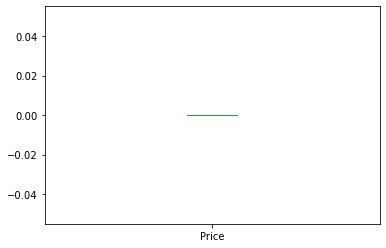

In [428]:
df_app.Price.plot.box();


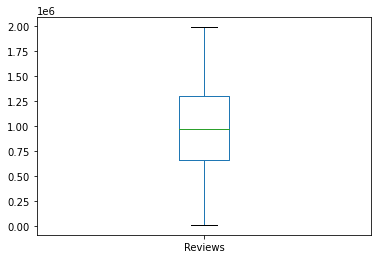

In [429]:
df_app.Reviews.plot.box();
#we observe that very few apps have high rating.

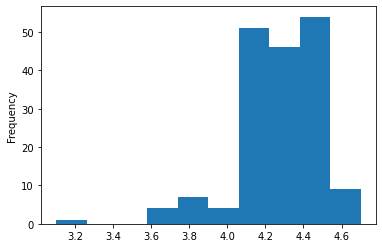

In [432]:
df_app.Rating.plot.hist();

#frequency of ratings are distributed more towards higher ratings

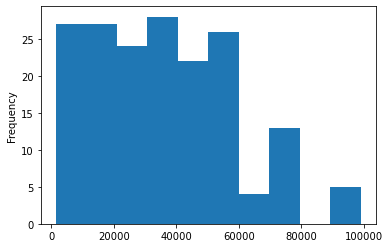

In [433]:
df_app.Size.plot.hist();

#frequency of apps with low size is more and decreases significantly as the app size increases



# From the box plot, it seems like there are some apps with very high price. Drop records above 200 as they maybe junk apps

In [434]:
df_app.drop(df_app[df_app['Price'] >=200].index,inplace=True)


# Very few apps have very high number of reviews. These are all star appsthat don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [435]:
df_app.drop(df_app[df_app['Reviews'] > 2000000].index,inplace=True)


# Different percentile for Installs and keeping only those records above a threshold

In [401]:
df_app.Installs.quantile([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

0.10           0.0
0.25        1000.0
0.50       50000.0
0.75     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

In [402]:
df_app = df_app[df_app.Installs > 10000000.0].copy()

In [436]:
df_app.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
183,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
214,Secure Folder,BUSINESS,3.8,14760,8600.0,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
281,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
333,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up


# Scatter plot with regression line
# The regression line shows a slight positive correlation between Price and Rating, but as the 90% of prices are under 20 that is not a conclusion we can take


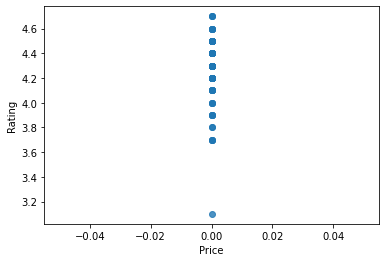

In [404]:

sns.regplot(x=df_app['Price'], y=df_app['Rating']);




<AxesSubplot:xlabel='Rating', ylabel='Size'>

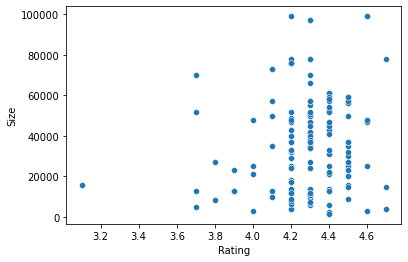

In [405]:
sns.scatterplot(x="Rating", y="Size", data=df_app)
#its quite clear that heavy apps dont have a better rating.

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

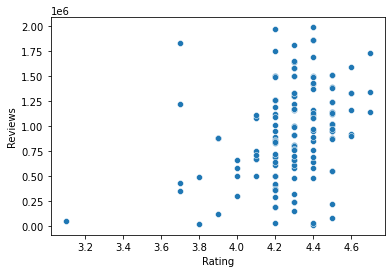

In [406]:
sns.scatterplot(x="Rating", y="Reviews", data=df_app)
#more number of reviews does not contribute to better rating. Mid-range reviews have better ratings that high number of reviews.

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

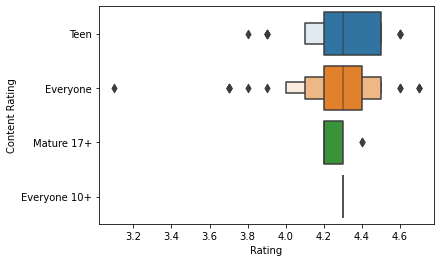

In [407]:
sns.boxenplot(x="Rating", y="Content Rating", data=df_app)
#its clear that Content rating for Teen are liked better

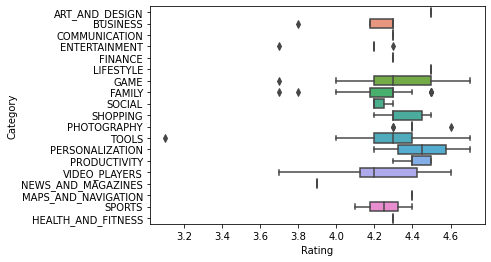

In [438]:
sns.boxplot(x='Rating',y='Category',data=df_app);
#Game category is most popular having the better share of ratings.


# create a copy of data frame

In [409]:
inp1 = df_app.copy()

In [410]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
183,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
214,Secure Folder,BUSINESS,3.8,14760,8600.0,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
281,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
333,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up


In [411]:
inp1[['Installs','Reviews']]

,Installs,Reviews
3,50000000,215644
183,100000000,1002861
214,50000000,14760
281,100000000,1002859
333,100000000,659395
...,...,...
9035,50000000,839206
9060,50000000,320334
9071,50000000,687136
9141,50000000,660613


In [440]:
inp1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 3 to 9155
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        176 non-null    object 
 1   Rating          176 non-null    float64
 2   Reviews         176 non-null    float64
 3   Size            176 non-null    float64
 4   Installs        176 non-null    float64
 5   Type            176 non-null    object 
 6   Price           176 non-null    float64
 7   Content Rating  176 non-null    object 
 8   Genres          176 non-null    object 
dtypes: float64(5), object(4)
memory usage: 17.8+ KB


# Drop unwanted cols

In [413]:
inp1.drop(columns = { 'App','Last Updated','Current Ver','Android Ver'},
inplace=True)

In [441]:
inp1.head()


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design
183,BUSINESS,4.3,13.818368,35000.0,18.420681,Free,0.0,Everyone,Business
214,BUSINESS,3.8,9.599744,8600.0,17.727534,Free,0.0,Everyone,Business
281,BUSINESS,4.3,13.818366,35000.0,18.420681,Free,0.0,Everyone,Business
333,COMMUNICATION,4.3,13.399080,11000.0,18.420681,Free,0.0,Everyone,Communication


# Apply log transformation (np.log1p) to Reviews and Installs.

In [415]:
inp1['Reviews'] = np.log1p(inp1['Reviews'])

In [416]:
inp1['Installs'] = np.log1p(inp1['Installs'])




In [442]:
inp1.head()


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design
183,BUSINESS,4.3,13.818368,35000.0,18.420681,Free,0.0,Everyone,Business
214,BUSINESS,3.8,9.599744,8600.0,17.727534,Free,0.0,Everyone,Business
281,BUSINESS,4.3,13.818366,35000.0,18.420681,Free,0.0,Everyone,Business
333,COMMUNICATION,4.3,13.399080,11000.0,18.420681,Free,0.0,Everyone,Communication


# Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric.

In [443]:

dum_cols = ['Category','Genres','Content Rating']
inp2 = pd.get_dummies(inp1,columns=dum_cols,drop_first=True)
inp2

,Rating,Reviews,Size,Installs,Type,Price,Category_BUSINESS,Category_COMMUNICATION,Category_ENTERTAINMENT,Category_FAMILY,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Video Players & Editors,Genres_Word,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
3,4.5,12.281389,25000.0,17.727534,Free,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
183,4.3,13.818368,35000.0,18.420681,Free,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,3.8,9.599744,8600.0,17.727534,Free,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,4.3,13.818366,35000.0,18.420681,Free,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333,4.3,13.399080,11000.0,18.420681,Free,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,4.2,13.640213,12000.0,17.727534,Free,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9060,4.3,12.677123,27000.0,17.727534,Free,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9071,4.4,13.440289,54000.0,17.727534,Free,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9141,4.0,13.400925,21000.0,17.727534,Free,0.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [444]:
inp2.pop('Type')



3       Free
183     Free
214     Free
281     Free
333     Free
        ... 
9035    Free
9060    Free
9071    Free
9141    Free
9155    Free
Name: Type, Length: 176, dtype: object

# Train test split and apply 70-30 split.

In [446]:

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)
y_train = df_train.Rating
X_train = df_train
y_test = df_test.Rating
X_test = df_test
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

# Reporting r2 for the model

In [421]:
from sklearn.metrics import r2_score
y_train_pred= lr.predict(X_train)
r2_score(y_train, y_train_pred)
#R2 of 1 indicates that the regression predictions perfectly fit the data.

1.0

In [422]:
y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred)
#R2 of 1 indicates that the regression predictions perfectly fit the data.

1.0